In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df_data = pd.read_csv('kidney_disease.csv')

In [3]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df_data.shape

(400, 26)

In [6]:
df_data.drop('id',axis=1,inplace=True)

In [7]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df_data.columns = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps',
                   'bacteria','blood_glucose_random','blood_urea','serum_creatinine',
                   'sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
                   'hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema',
                   'anemia','class']

In [10]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
text_columns = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for i in text_columns:
    print(f"{i} : {df_data[i].dtype}")

packed_cell_volume : object
white_blood_cell_count : object
red_blood_cell_count : object


In [12]:
def convert_text_to_numeric(df_data, column):
    df_data[column] = pd.to_numeric(df_data[column],errors='coerce')
    
for column in text_columns:
    convert_text_to_numeric(df_data,column)
    print(f"{column} : {df_data[column].dtype}")

packed_cell_volume : float64
white_blood_cell_count : float64
red_blood_cell_count : float64


In [13]:
missing = df_data.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(26)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
dtype: int64

In [14]:
def mean_value_imputation(df_data,column):
    mean_value = df_data[column].mean()
    df_data[column].fillna(value=mean_value,inplace=True)
    
def mode_value_imputation(df_data,column):
    mode_value = df_data[column].mode()[0]
    df_data[column].fillna(mode_value)

In [15]:
num_cols = [col for col in df_data.columns if df_data[col].dtype != 'object']
num_cols


['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [16]:
for col_name in num_cols:
    mean_value_imputation(df_data,col_name)

In [17]:
categ_cols = [col for col in df_data.columns if df_data[col].dtype == 'object']
categ_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [18]:
#for col in categ_cols:
   # mode_value_imputation(df_data,col)

In [19]:
missing = df_data.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(26)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
dtype: int64

In [20]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [21]:
print(f"diabetes_mellitus : {df_data['diabetes_mellitus'].unique()} ")
print(f"coronary_artery_disease : {df_data['coronary_artery_disease'].unique()}")
print(f"class : {df_data['class'].unique()}")

diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan] 
coronary_artery_disease : ['no' 'yes' '\tno' nan]
class : ['ckd' 'ckd\t' 'notckd']


In [22]:
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace={' yes':'yes', '\tyes':'yes', '\tno':'no'})

df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].replace(to_replace = {'\tno':'no'})

df_data['class'] = df_data['class'].replace(to_replace = {'ckd\t':'ckd'})

In [23]:
print(f"diabetes_mellitus : {df_data['diabetes_mellitus'].unique()} ")
print(f"coronary_artery_disease : {df_data['coronary_artery_disease'].unique()}")
print(f"class : {df_data['class'].unique()}")

diabetes_mellitus : ['yes' 'no' nan] 
coronary_artery_disease : ['no' 'yes' nan]
class : ['ckd' 'notckd']


In [24]:
def fillnull(df_data,column,val):
    df_data[column].fillna(value=val,inplace=True)

# red_blood_cells

In [25]:
df_data['red_blood_cells'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [26]:
df_data['red_blood_cells'].value_counts()

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

In [27]:
fillnull(df_data,'red_blood_cells','normal')

In [28]:
df_data['red_blood_cells'].unique()

array(['normal', 'abnormal'], dtype=object)

# pus_cell

In [29]:
df_data['pus_cell'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [30]:
df_data['pus_cell'].value_counts()

normal      259
abnormal     76
Name: pus_cell, dtype: int64

In [31]:
fillnull(df_data,'pus_cell','normal')

In [32]:
df_data['pus_cell'].unique()

array(['normal', 'abnormal'], dtype=object)

# pus_cell_clumps

In [33]:
df_data['pus_cell_clumps'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [34]:
df_data['pus_cell_clumps'].value_counts()

notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64

In [35]:
fillnull(df_data,'pus_cell_clumps','notpresent')

In [36]:
df_data['pus_cell_clumps'].unique()

array(['notpresent', 'present'], dtype=object)

# bacteria

In [37]:
df_data['bacteria'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [38]:
df_data['bacteria'].value_counts()

notpresent    374
present        22
Name: bacteria, dtype: int64

In [39]:
fillnull(df_data,'bacteria','notpresent')

In [40]:
df_data['bacteria'].unique()

array(['notpresent', 'present'], dtype=object)

# hypertension

In [41]:
df_data['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

In [42]:
df_data['hypertension'].value_counts()

no     251
yes    147
Name: hypertension, dtype: int64

In [43]:
fillnull(df_data,'hypertension','no')

In [44]:
df_data['hypertension'].unique()

array(['yes', 'no'], dtype=object)

# diabetes_mellitus

In [45]:
df_data['diabetes_mellitus'].value_counts()

no     261
yes    137
Name: diabetes_mellitus, dtype: int64

In [46]:
fillnull(df_data,'diabetes_mellitus','no')

In [47]:
df_data['diabetes_mellitus'].unique()

array(['yes', 'no'], dtype=object)

# coronary_artery_disease

In [48]:
df_data['coronary_artery_disease'].value_counts()

no     364
yes     34
Name: coronary_artery_disease, dtype: int64

In [49]:
fillnull(df_data,'coronary_artery_disease','no')

In [50]:
df_data['coronary_artery_disease'].unique()

array(['no', 'yes'], dtype=object)

# appetite

In [51]:
df_data['appetite'].value_counts()

good    317
poor     82
Name: appetite, dtype: int64

In [52]:
fillnull(df_data,'appetite','good')

In [53]:
df_data['appetite'].unique()

array(['good', 'poor'], dtype=object)

# peda_edema

In [54]:
df_data['peda_edema'].value_counts()

no     323
yes     76
Name: peda_edema, dtype: int64

In [55]:
fillnull(df_data,'peda_edema','no')

In [56]:
df_data['peda_edema'].unique()

array(['no', 'yes'], dtype=object)

# anemia

In [57]:
df_data['anemia'].value_counts()

no     339
yes     60
Name: anemia, dtype: int64

In [58]:
fillnull(df_data,'anemia','no')

In [59]:
df_data['anemia'].unique()

array(['no', 'yes'], dtype=object)

In [60]:
missing = df_data.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(26)

Series([], dtype: int64)

In [61]:
print(f"diabetes_mellitus : {df_data['diabetes_mellitus'].unique()} ")
print(f"coronary_artery_disease : {df_data['coronary_artery_disease'].unique()}")
print(f"class : {df_data['class'].unique()}")

diabetes_mellitus : ['yes' 'no'] 
coronary_artery_disease : ['no' 'yes']
class : ['ckd' 'notckd']


In [62]:
df_data['class'] = df_data['class'].map({'ckd':1 , 'notckd':0})
df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal':1 , "abnormal":0})
df_data['pus_cell'] = df_data['pus_cell'].map({'normal':1 , "abnormal":0})
df_data['pus_cell_clumps'] = df_data['pus_cell_clumps'].map({'present':1 , "notpresent":0})

df_data['bacteria'] = df_data['bacteria'].map({'present':1 , "notpresent":0})
df_data['hypertension'] = df_data['hypertension'].map({'yes':1 , "no":0})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes':1 , "no":0})

df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes':1 , "no":0})
df_data['appetite'] = df_data['appetite'].map({'good':1 , "poor":0})
df_data['peda_edema'] = df_data['peda_edema'].map({'yes':1 , "no":0})
df_data['anemia'] = df_data['anemia'].map({'yes':1 , "no":0})

In [63]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


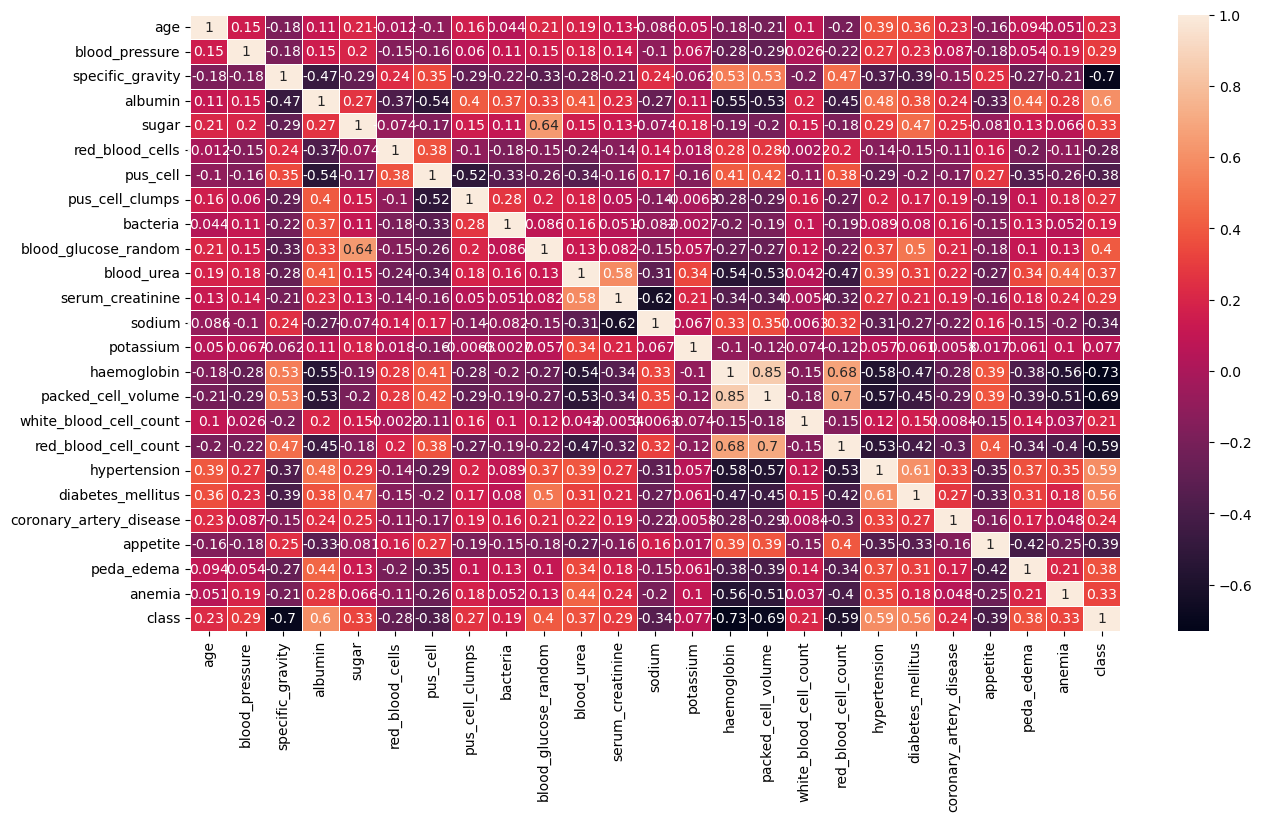

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(),annot=True,linewidth = 0.5)
plt.show()

In [65]:
target_corr = df_data.corr()['class'].abs().sort_values(ascending = False)[1:]
print(target_corr)

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64


In [66]:
df_data['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [67]:
x = df_data.drop('class',axis=1)
y = df_data['class']

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=25)

In [69]:
print(f"xtrain shape : {x_train.shape}")
print(f"xtest shape : {x_test.shape}")

xtrain shape : (280, 24)
xtest shape : (120, 24)


In [71]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred_dct = dct.predict(x_test)
y_pred_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [82]:
models = []
models.append(('Naive_Bayes',GaussianNB()))
#models.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SVM',SVC(kernel='linear')))

In [83]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [85]:
for name, model in models:
    print(name,model)
    print()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy: ",accuracy_score(y_test,y_pred))
    print('\n')
    print("precision: ",precision_score(y_test,y_pred))
    print('\n')
    print("recall: ",recall_score(y_test,y_pred))
    print('\n')
    print("f1score: ",f1_score(y_test,y_pred))
    print('\n-------------------------------------------------------------------------------------------------------------')

Naive_Bayes GaussianNB()

[[46  0]
 [ 5 69]]


accuracy:  0.9583333333333334


precision:  1.0


recall:  0.9324324324324325


f1score:  0.965034965034965

-------------------------------------------------------------------------------------------------------------
RandomForestClassifier RandomForestClassifier()

[[44  2]
 [ 1 73]]


accuracy:  0.975


precision:  0.9733333333333334


recall:  0.9864864864864865


f1score:  0.9798657718120806

-------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier DecisionTreeClassifier()

[[43  3]
 [ 0 74]]


accuracy:  0.975


precision:  0.961038961038961


recall:  1.0


f1score:  0.9801324503311257

-------------------------------------------------------------------------------------------------------------
SVM SVC(kernel='linear')

[[42  4]
 [ 4 70]]


accuracy:  0.9333333333333333


precision:  0.9459459459459459


recall:  0.9459459459459459


f1score:  0.945945945945